In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
from netplot import ModelPlot
from tensorflow.keras.utils import plot_model
print(tf.__version__)


2.7.0


### CNN

In [20]:
# load in our data
data = pd.read_csv('train.csv')
data.drop(['license','freesound_id', 'manually_verified'], axis=1, inplace=True)
data.head()


,fname,label
0,00044347.wav,Hi-hat
1,001ca53d.wav,Saxophone
2,002d256b.wav,Trumpet
3,0033e230.wav,Glockenspiel
4,00353774.wav,Cello


In [33]:
# using librosa for every fname in our data generate a mel spectrogram and save it to a numpy array
melspec = None
for x, k in enumerate(data['fname']):
    if x == 600:
        y, sr = librosa.load('audio_data_set/' + k, sr=None)
        D = np.abs(librosa.stft(y))**2
        
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=8000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        #melspec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        print(x, k, sr)
        break

# plot spectrogram using matplotlib



600 114cf102.wav 44100


AttributeError: module 'librosa' has no attribute 'display'

<Figure size 720x288 with 0 Axes>

In [22]:
# this may be wrong I do need the spectrogram
# # get dummies of the insurance data
# dummies = pd.get_dummies(data)
# dummies.head()

In [23]:

# set the random seed
tf.random.set_seed(42)

# construct our model
cnn_test_model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    ]    
)

# 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

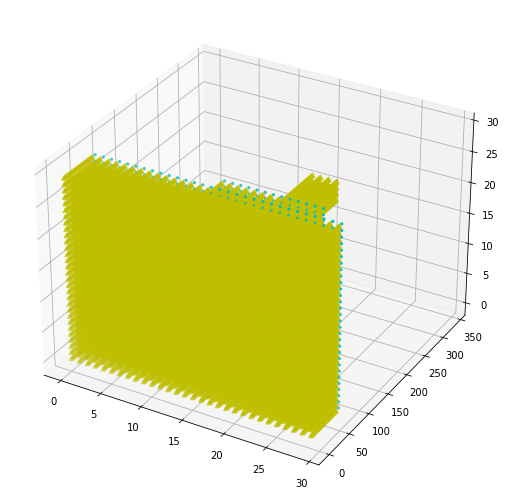

In [24]:
modelplot = ModelPlot(model=cnn_test_model, grid=True, connection=True, linewidth=0.1)
modelplot.show()